>sp|P01308|INS_HUMAN Insulin OS=Homo sapiens OX=9606 GN=INS PE=1 SV=1
MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAED
LQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN

In [29]:
from random import Random

def AminoacidGenerator(number, length):
#     print '***generate random aminoacid sequence ***'
#     codeFile = open('codes.txt', 'w')
    if number <= 0:
        return 'invalid number of protein'
    else:
        aminoacid = 'ACDEFGHIKLMNPQRSTVWY'      
        random = Random()
        for j in range(1, number + 1):
            seq = ''
            for i in range(1, length+1):
                index = random.randint(1,len(aminoacid))
                seq = seq + aminoacid[index -1]
            activity = seq.find('G') + seq.find('Q')
            print(seq+ ', '+ str(activity))
#     return str
#             codeFile.write(str+'\n')


# 100개 길이의 단백질 서열을 100개 만들어 봅니다. 
print(AminoacidGenerator(100, 9))

HKQKCPGDH, 8
KKRTMAKQY, 6
RVNKMKYAN, -2
RENFCYMAH, -2
YWNSRAGAH, 5
FPVTQVQWW, 3
VDMHGATQK, 11
IEGKYSQHV, 8
NEKAPNWTG, 7
ARFRYGQTP, 11
TTHLDVNAH, -2
KDYYIWCDV, -2
RNYPWYTYY, -2
AWGNKGDLG, 1
HGHWDTHVP, 0
YKGTSEQAF, 8
DLSHHWSWI, -2
SMVCAYVIT, -2
LITRFGGRK, 4
EDVVQIILK, 3
CATEGVHIC, 3
MVKVLWRME, -2
DLVQPHRAG, 11
GNSVWCRCR, -1
MLANAMCMR, -2
VGLEGCSHH, 0
HHWCQWPSS, 3
ENHMGDMQQ, 11
SWYRLTQGF, 13
KMPLLVMWG, 7
AMMVMYMDD, -2
ESMNTFFIN, -2
LEVCMMPPK, -2
SITCCHPHE, -2
GNKKVRWRM, -1
NSPDPPYWF, -2
VFSFLYSFE, -2
SWTTLAQQT, 5
MFDSTNVQC, 6
YKEYHKIWK, -2
GDVSHAIMQ, 8
ESMNHTFRR, -2
ENMEWGHQR, 12
WRPEISHHG, 7
FGTHKEHGF, 0
TSMFPIILK, -2
NDRGTKFLF, 2
KHCGHWSVV, 2
RCTKDCIAY, -2
RIERPDPSV, -2
MTINWDLSL, -2
VALYGYCVQ, 12
NCEMWNAMF, -2
SNAWKWMDQ, 7
VCRKAWMVH, -2
IQVHDMHMY, 0
IGLHDIVQH, 8
VIFGTYPDQ, 11
SEVRIWVVC, -2
YHIANQFTH, 4
VNAHNANEL, -2
NYPPMVRPF, -2
QSNATWFLH, -1
HNSVGLSCK, 3
EFQAKGCCY, 7
PGKLQALIV, 5
PVDRFIFFT, -2
SEGEIILWI, 1
MPFMAAKYY, -2
RPWPMCHAE, -2
PFINRRNVM, -2
YPAFIKRRA, -2
WKGNMKLMP, 1
TTSPYMFYA

In [42]:
import pandas as pd
df = pd.read_csv('./data/random_seq.csv',header=None)
df.tail()

,0,1,2,3,4,5,6,7,8,9,10
95,M,Y,T,H,G,M,C,F,D,T,11
96,M,V,K,P,N,E,S,K,Y,M,-2
97,M,Y,D,S,I,M,V,A,D,S,-2
98,M,M,T,K,I,E,F,C,Q,Y,23
99,M,M,M,C,T,V,S,W,V,N,-2


In [97]:
df.describe()

,10
count,100.000000
mean,8.850000
std,12.077506
min,-2.000000
25%,-2.000000
50%,5.000000
75%,20.000000
max,42.000000


In [70]:
X = df.iloc[:, 0:10]
y = df[10]
X.head()

,0,1,2,3,4,5,6,7,8,9
0,M,F,V,R,M,K,K,Q,M,R
1,M,F,N,P,H,Y,D,Q,H,A
2,M,M,K,Y,K,A,A,P,R,G
3,M,T,T,E,N,H,C,C,H,K
4,M,R,H,Q,F,Q,L,G,I,N


In [72]:
y.shape

(100,)

In [73]:
X = X.apply(LabelEncoder().fit_transform)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0,4,17,14,10,8,8,13,10,14
1,0,4,11,12,6,19,2,13,6,0
2,0,10,8,19,8,0,0,12,14,5
3,0,16,16,3,11,6,1,1,6,8
4,0,14,6,13,4,13,9,5,7,11


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(80, 10) (80,)


In [75]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [76]:
reg.score(X_train, y_train)

0.09183221657153307

In [92]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, solver='newton-cg', multi_class='auto')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
clf.score(X_train, y_train)

0.725

In [96]:
y_pred = clf.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

np.sqrt(mean_squared_error(y_test,y_pred))

15.868207208125309

In [98]:
clf.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)>

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


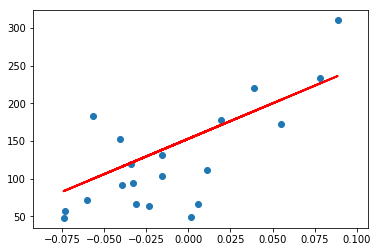

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test)
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=2)

plt.show()